In [254]:
# INFO: Baseline model. Currently fixing!
import nltk
from nltk.stem import SnowballStemmer
import pandas as pd
from preprocess.setup import Preprocess

nltk.download("punkt")

import os
os.getcwd()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\driti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'c:\\Users\\driti\\Documents\\NTNU\\Master\\master-project\\notebooks'

In [255]:
df = pd.read_csv("../data/NorMedTerm.csv", delimiter="\t")

In [256]:
df = df[['a.', 'ABBREV']]

In [257]:
df['ABBREV'] = df['ABBREV'].apply(lambda x: 'TREATMENT' if x in ['PROCEDURE', 'SUBSTANCE'] 
                                   else 'CONDITION' if x == 'CONDITION' 
                                   else 'O')

In [258]:
data = df['a.'].apply(lambda x: len(x.split()))
df['Length'] = data

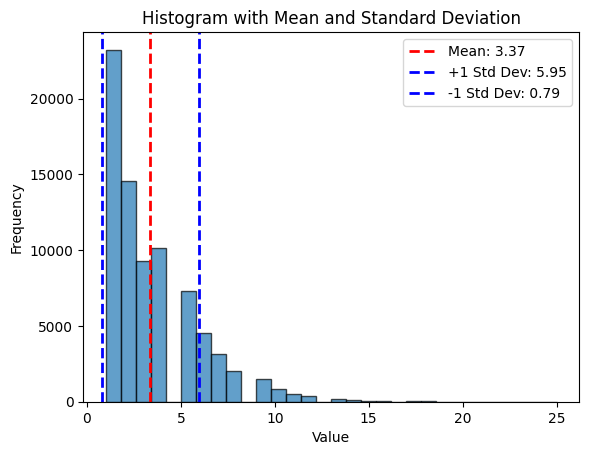

In [259]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Create histogram
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)

# Add lines for mean and standard deviation
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(mean + std_dev, color='blue', linestyle='dashed', linewidth=2, label=f'+1 Std Dev: {mean + std_dev:.2f}')
plt.axvline(mean - std_dev, color='blue', linestyle='dashed', linewidth=2, label=f'-1 Std Dev: {mean - std_dev:.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Mean and Standard Deviation')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [260]:
import statistics
statistics.median(data)

3.0

In [261]:
max_row = df.loc[df['Length'].idxmax()]
max_row['a.']

'Ondartet svulst i andre og ufullstendig angitte lokalisasjoner i leppe, munnhule og svelg (neoplasma malignum loco alio et male definito labii, cavi oris et pharyngis)'

In [262]:
df

,a.,ABBREV,Length
0,abakteriell,O,1
1,abarognose,CONDITION,1
2,Abboticin,TREATMENT,1
3,AIS,O,1
4,ABC-førstehjelp,O,1
...,...,...,...
78099,Vene,O,1
78100,Veneport,O,1
78101,Vesikkel,O,1
78102,Vulva,O,1


In [263]:
df = df[df['Length'] < 4].sort_values(by="Length",ascending=False)

In [264]:
df

,a.,ABBREV,Length
22154,Status etter artrodese,CONDITION,3
37037,Diethyl ester dihydrochloride,TREATMENT,3
61087,Ruptur traumatisk symfyse,CONDITION,3
65562,Bordetella holmesii DNA,TREATMENT,3
61088,Ruptur traumatisk torakalskive,CONDITION,3
...,...,...,...
35455,Cetrimide,TREATMENT,1
35454,Cetrimid,TREATMENT,1
35449,Cetraxal,TREATMENT,1
35448,Cetostearylnatriumsulfat,TREATMENT,1


In [265]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("norwegian")
stemmer.stem("pasient")

'pasient'

In [266]:
from collections import Counter

temp = df[["a.", "ABBREV"]].values
temp


array([['Status etter artrodese', 'CONDITION'],
       ['Diethyl ester dihydrochloride', 'TREATMENT'],
       ['Ruptur traumatisk symfyse', 'CONDITION'],
       ...,
       ['Cetraxal', 'TREATMENT'],
       ['Cetostearylnatriumsulfat', 'TREATMENT'],
       ['Jern', 'TREATMENT']], dtype=object)

In [267]:
orig_data = {}

words = {   
}
for item in temp:
    curr = item[0].split()
    for word in curr:
        word = stemmer.stem(word)
        if word not in words:
            words[word] = {}
            words[word]['Count'] = 0
            words[word]['Category'] = set()
        words[word]['Category'].add(item[1])
        words[word]['Count'] += 1



In [268]:
words

{'status': {'Count': 21, 'Category': {'CONDITION', 'O', 'TREATMENT'}},
 'ett': {'Count': 101, 'Category': {'CONDITION', 'TREATMENT'}},
 'artrodes': {'Count': 2, 'Category': {'CONDITION'}},
 'diethyl': {'Count': 6, 'Category': {'TREATMENT'}},
 'est': {'Count': 5, 'Category': {'TREATMENT'}},
 'dihydrochlorid': {'Count': 18, 'Category': {'TREATMENT'}},
 'ruptur': {'Count': 16, 'Category': {'CONDITION'}},
 'traumatisk': {'Count': 74, 'Category': {'CONDITION'}},
 'symfys': {'Count': 2, 'Category': {'CONDITION', 'O'}},
 'bordetell': {'Count': 15, 'Category': {'TREATMENT'}},
 'holmesii': {'Count': 3, 'Category': {'TREATMENT'}},
 'dna': {'Count': 353, 'Category': {'TREATMENT'}},
 'torakalskiv': {'Count': 1, 'Category': {'CONDITION'}},
 'rygg': {'Count': 25, 'Category': {'CONDITION', 'O'}},
 'ankyloser': {'Count': 5, 'Category': {'CONDITION'}},
 'hyperostos': {'Count': 5, 'Category': {'CONDITION'}},
 'dislokasjon': {'Count': 52, 'Category': {'CONDITION'}},
 'residiver': {'Count': 15, 'Category'

In [269]:
temp_df = pd.DataFrame(columns=['Word', 'Category', 'Count'])
temp_df['Word'] = words.keys()
temp_df['Category'] = [ list(words[word]['Category'])[0] if len(words[word]['Category']) == 1 else 'O' for word in words]
temp_df['Count'] = [words[word]['Count'] for word in words]

# Sort by count (optional)
temp_df = temp_df.sort_values(by='Count', ascending=False)

In [270]:
temp_df['Word-Length']= temp_df['Word'].apply(lambda x: len(x))

In [271]:
pd.set_option('display.max_rows', 50)  # Set to 50 rows


In [272]:
temp_df.sort_values(by="Count", ascending=False)

,Word,Category,Count,Word-Length
326,av,O,784,2
118,i,O,628,1
495,uspesifiser,O,563,11
22,ina,O,561,3
30,og,O,418,2
...,...,...,...,...
35326,dinatriumhydrogenfosfatmonohydrat,TREATMENT,1,33
35327,dinatriumhydrogenfosfatheptahydrat,TREATMENT,1,34
35328,dinatriumhydrogenfosfatdodekahydrat,TREATMENT,1,35
35329,dinatriumhydrogenfosfatdihydrat,TREATMENT,1,31


In [279]:
stemmer.stem("brystsmerter")

'brystsmert'

In [280]:
temp_df[temp_df['Word']=="brystsmert"]

,Word,Category,Count,Word-Length


In [274]:
temp_df.sort_values(by="Word-Length", ascending=True)

,Word,Category,Count,Word-Length
67,2,O,20,1
7098,p,O,8,1
1355,h,TREATMENT,7,1
460,x,O,7,1
2091,4,O,7,1
...,...,...,...,...
17844,5-[3-[(1-amino-3-metyl-1-oksobutan-2-yl)karbam...,TREATMENT,1,73
23677,(2s)-2-[[1-[(4-fluorofenyl)metyl]indasol-3-kar...,TREATMENT,1,74
23247,"n-[(3s,5s,7s)-adamantan-1-yl]-1-(4-hydroksypen...",TREATMENT,1,75
23246,"n-[(3s,5s,7s)-adamantan-1-yl]-1-(5-hydroksypen...",TREATMENT,1,75


In [275]:
common = pd.read_csv('./common.csv', header=None, delimiter=",")

In [276]:
common.values

array([['av'],
       ['i'],
       ['uspesifisert'],
       ['og'],
       ['annen'],
       ['med'],
       ['etter'],
       ['andre'],
       ['ved'],
       ['på'],
       ['kombinasjoner'],
       ['spesifisert'],
       ['til'],
       ['min'],
       ['flere'],
       ['eller'],
       ['uten'],
       ['som'],
       ['har']], dtype=object)